<a href="https://colab.research.google.com/github/JuliaJakimowicz/SystemyUcz-ceSi-AnalizaDanych/blob/main/Diabetes_Analysis_Zadania.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Zadanie: Eksploracja zbioru Diabetes
Wykonaj poniższe kroki, aby przeanalizować zbiór danych dotyczący cukrzycy.

## 📌 1. Wczytanie zbioru danych Diabetes
- Wczytaj zbiór danych **Diabetes** dostępny publicznie.
    url = 'https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv'
    https://www.kaggle.com/datasets/mathchi/diabetes-data-set
   
- Wyświetl pierwsze wiersze, aby zapoznać się ze strukturą danych.

In [2]:
import pandas as pd
import numpy as np

# Wczytanie zbioru danych
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv")


# Podgląd pierwszych 5 wierszy
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 📌 2. Podstawowe statystyki zbioru danych
- Sprawdź podstawowe statystyki zmiennych numerycznych (`df.describe()`).
- Sprawdź typy danych i obecność brakujących wartości.

In [3]:
# Opis statystyczny danych
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [4]:
# Sprawdzenie typów danych i braków
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                      

## 📌 3. Sprawdzenie i uzupełnianie brakujących wartości
- Zidentyfikuj brakujące wartości.
- Uzupełnij brakujące wartości medianą.

In [ ]:
from sklearn.impute import SimpleImputer

# Uzupełnianie braków medianą
Nie ma braków danych w analizowanym zbiorze

## 📌 4. Analiza korelacji między zmiennymi
- Oblicz macierz korelacji dla zbioru danych.
- Zwizualizuj korelację między zmiennymi.

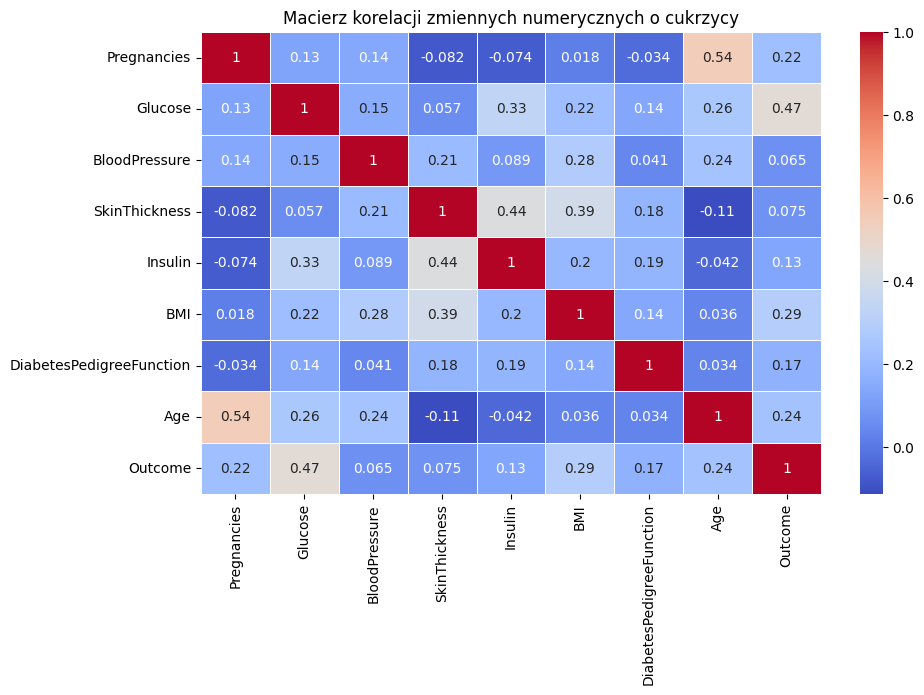

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Macierz korelacji
selected_features = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(10,6))
sns.heatmap(df[selected_features].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Macierz korelacji zmiennych numerycznych o cukrzycy")
plt.show()

## 📌 5. Kodowanie i normalizacja zmiennych
- Jeśli są zmienne kategoryczne, zastosuj **OneHotEncoding**.
- Przeskaluj zmienne numeryczne przy użyciu **StandardScaler**.

In [16]:
from sklearn.preprocessing import StandardScaler

# Normalizacja zmiennych numerycznych
min_max_scaler = StandardScaler()
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = min_max_scaler.fit_transform(df[numeric_columns])

## 📌 6. Identyfikacja wartości odstających
- Wykryj wartości odstające metodą Z-score.
- Zwizualizuj wartości odstające na wykresach pudełkowych.

In [17]:
from scipy import stats

# Obliczenie Z-score dla każdego punktu

z_scores = np.abs(stats.zscore(df.select_dtypes(include=['number'])))
print((z_scores > 3).sum(axis=0))



Pregnancies                  4
Glucose                      5
BloodPressure               35
SkinThickness                1
Insulin                     18
BMI                         14
DiabetesPedigreeFunction    11
Age                          5
Outcome                      0
dtype: int64


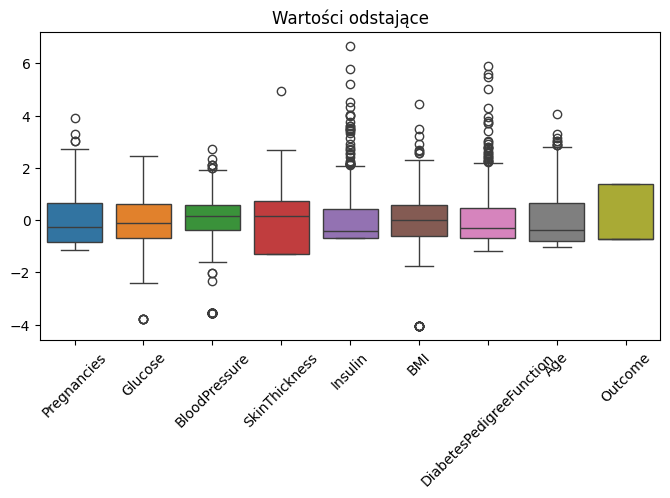

In [18]:
# Wizualizacja wartości odstających
plt.figure(figsize=(8,4))
sns.boxplot(data=df.select_dtypes(include=['number']))
plt.xticks(rotation=45)
plt.title("Wartości odstające")
plt.show()




## 📌 7. Podział zbioru na treningowy i testowy
- Wybierz zmienne niezależne (**X**) oraz zmienną docelową (**y**).
- Podziel zbiór danych na część treningową i testową w stosunku 80/20.

In [21]:
from sklearn.model_selection import train_test_split

# Wybór cech i zmiennej docelowej

features = df.select_dtypes(include=['number']).columns.drop('Outcome')
X = df[features]
y = df['Outcome']


# Podział zbioru na treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Rozmiar zbioru treningowego:", X_train.shape)
print("Rozmiar zbioru testowego:", X_test.shape)


Rozmiar zbioru treningowego: (614, 8)
Rozmiar zbioru testowego: (154, 8)


## 📌 8. Wizualizacja rozkładu danych
- Narysuj histogramy dla wybranych zmiennych. df.hist()
- Zbadaj rozkład wartości w zbiorze.

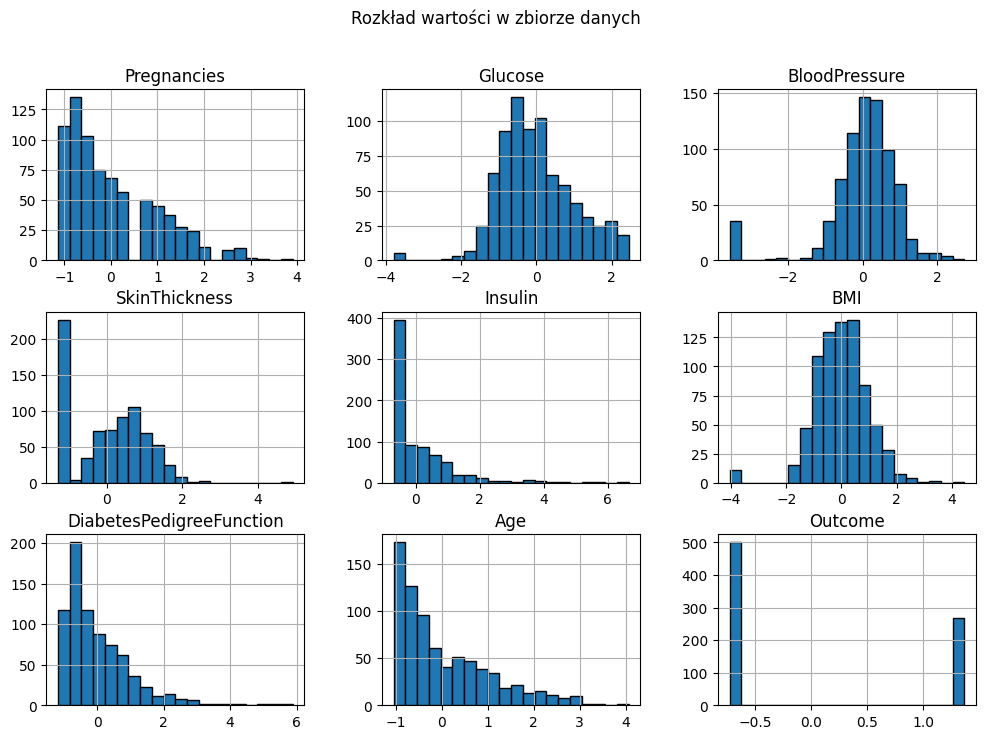

In [22]:
# Wizualizacja rozkładu zmiennych
import matplotlib.pyplot as plt

# Wizualizacja rozkładu zmiennych numerycznych
df.select_dtypes(include=['number']).hist(figsize=(12, 8), bins=20, edgecolor='black')

plt.suptitle("Rozkład wartości w zbiorze danych")
plt.show()
